<a href="https://colab.research.google.com/github/jithendar225/whether-forcasting-using-AI/blob/main/DAV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --quiet pandas requests openpyxl

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os, glob, pandas as pd
print("Drive mounted. /content/drive/MyDrive is your Drive root.")

Drive mounted. /content/drive/MyDrive is your Drive root.


In [4]:
!ls "/content/drive/MyDrive"

'Colab Notebooks'   datasets


In [5]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/datasets/weather-1.csv")
df.head()

,State/UT,District,Temperature (°C),Condition,Humidity (%),Wind Speed (km/h),Last Updated
0,Andhra Pradesh,Anantapur,22.1,Clear,64,14.4,2025-01-23 23:00:00
1,Andhra Pradesh,Chittoor,18.5,Clear,93,4.0,2025-01-23 23:00:00
2,Andhra Pradesh,East Godavari,19.4,Clear,86,3.6,2025-01-23 23:00:00
3,Andhra Pradesh,Guntur,22.3,Mist,88,5.4,2025-01-23 23:00:00
4,Andhra Pradesh,Krishna,22.3,Mist,88,10.8,2025-01-23 23:00:00


In [6]:
print(df.info())
print(df.describe())
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State/UT           1152 non-null   object 
 1   District           1152 non-null   object 
 2   Temperature (°C)   1152 non-null   float64
 3   Condition          1152 non-null   object 
 4   Humidity (%)       1152 non-null   int64  
 5   Wind Speed (km/h)  1152 non-null   float64
 6   Last Updated       1152 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.1+ KB
None
       Temperature (°C)  Humidity (%)  Wind Speed (km/h)
count       1152.000000   1152.000000        1152.000000
mean          19.744010     50.319444          12.669878
std            6.208434     18.517666           5.667097
min          -27.300000     11.000000           3.600000
25%           17.300000     35.000000           8.600000
50%           20.700000     47.000000          12.20

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Temperature over time
if "Date" in df.columns and "Temperature" in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x="Date", y="Temperature")
    plt.xticks(rotation=45)
    plt.title("Temperature Trend Over Time")
    plt.show()

# Example: Humidity distribution
if "Humidity" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["Humidity"], bins=20, kde=True)
    plt.title("Humidity Distribution")
    plt.show()


In [8]:
df.isnull().sum()


,0
State/UT,0
District,0
Temperature (°C),0
Condition,0
Humidity (%),0
Wind Speed (km/h),0
Last Updated,0


In [9]:
df = df.dropna()


In [10]:
print(df.columns.tolist())

['State/UT', 'District', 'Temperature (°C)', 'Condition', 'Humidity (%)', 'Wind Speed (km/h)', 'Last Updated']


In [11]:
# Print columns with repr to see hidden characters
for col in df.columns:
    print(repr(col))


'State/UT'
'District'
'Temperature (°C)'
'Condition'
'Humidity (%)'
'Wind Speed (km/h)'
'Last Updated'


In [12]:
# Example: Access Temperature and Last Updated safely
temperature_col = [col for col in df.columns if 'temperature' in col.lower()][0]
last_updated_col = [col for col in df.columns if 'last updated' in col.lower()][0]

# Convert to datetime
df[last_updated_col] = pd.to_datetime(df[last_updated_col])

# Create ordinal date column
df['date_ordinal'] = df[last_updated_col].map(pd.Timestamp.toordinal)

# Regression example
X = df[['date_ordinal']]
y = df[[temperature_col]]  # Use exact column found


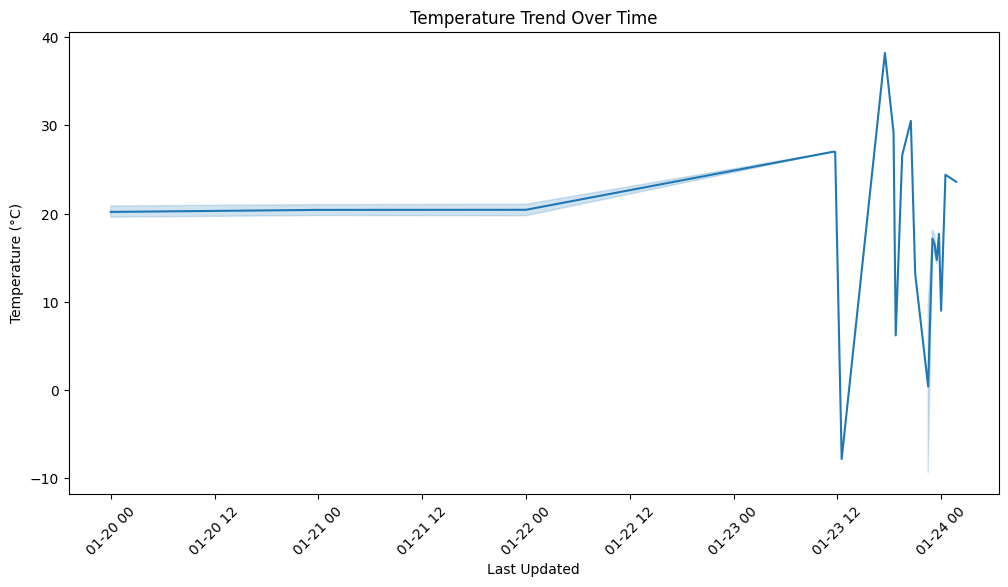

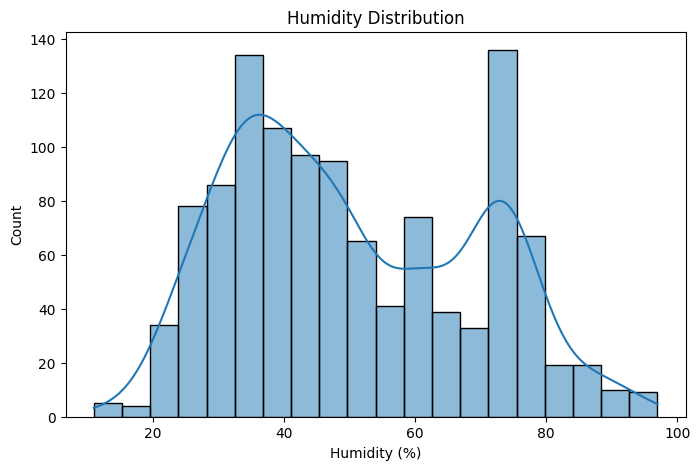

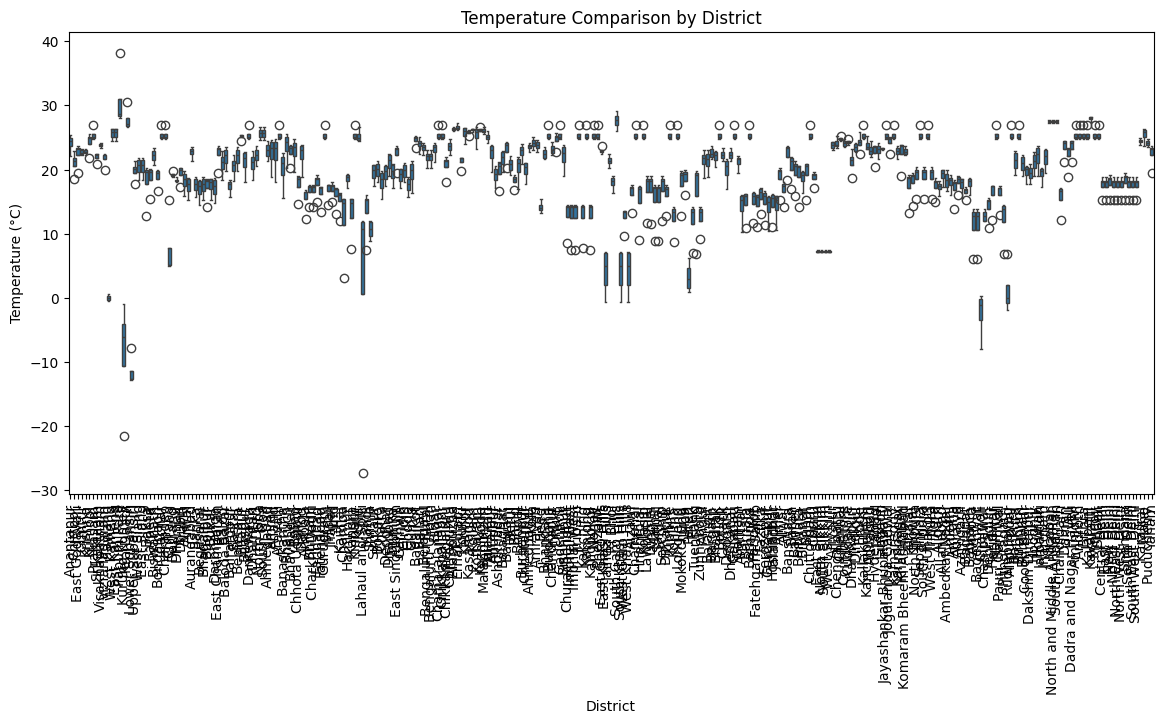

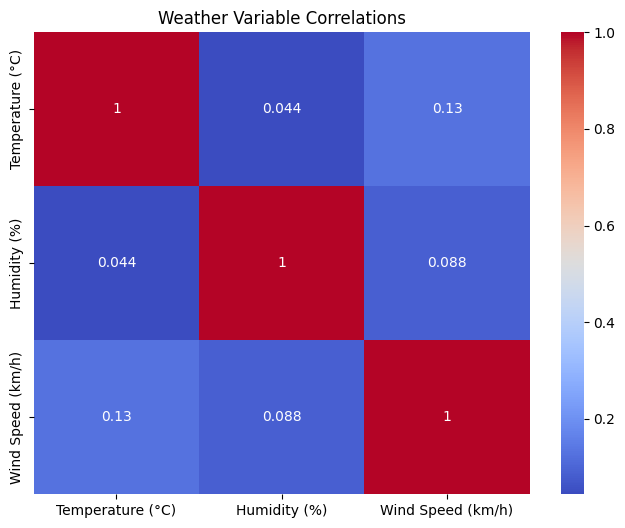

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Correct datetime conversion
df["Last Updated"] = pd.to_datetime(df["Last Updated"], format="%Y-%m-%d %H:%M:%S")

# 1. Temperature trend over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Last Updated", y="Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.xticks(rotation=45)
plt.show()

# 2. Humidity distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Humidity (%)"], bins=20, kde=True)
plt.title("Humidity Distribution")
plt.show()

# 3. Temperature comparison across Districts
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="District", y="Temperature (°C)")
plt.title("Temperature Comparison by District")
plt.xticks(rotation=90)
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    df[["Temperature (°C)", "Humidity (%)", "Wind Speed (km/h)"]].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Weather Variable Correlations")
plt.show()


In [14]:
df.to_csv("cleaned_weather.csv", index=False)


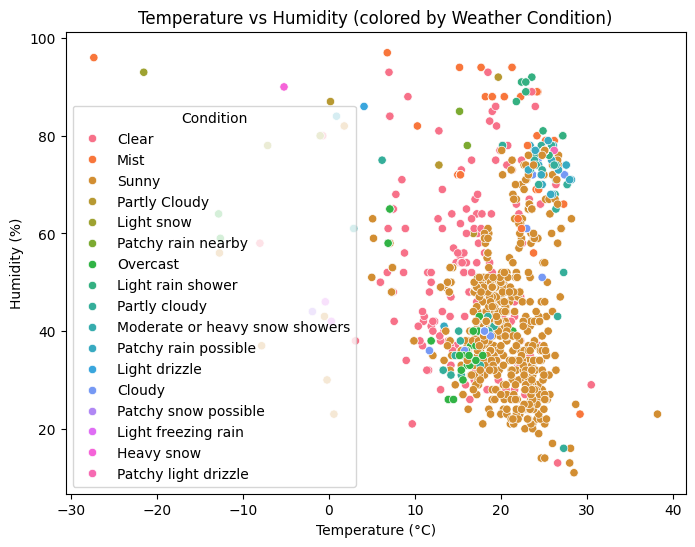

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Temperature (°C)", y="Humidity (%)", hue="Condition")
plt.title("Temperature vs Humidity (colored by Weather Condition)")
plt.show()


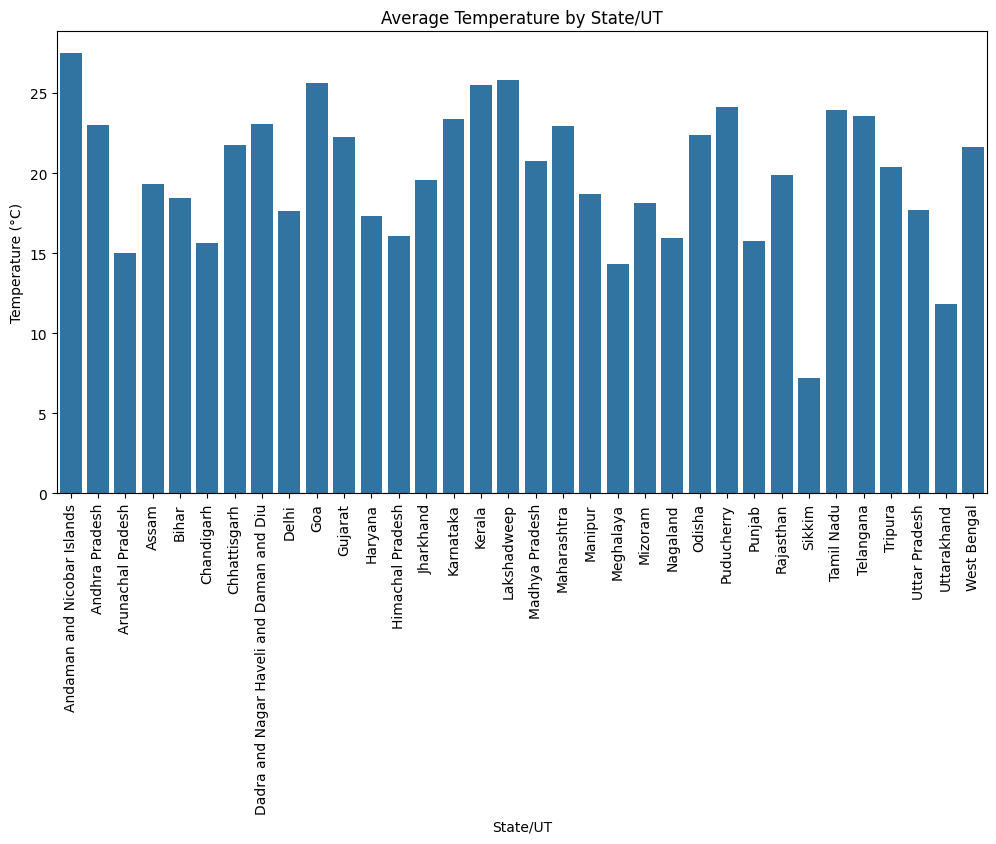

In [16]:
plt.figure(figsize=(12,6))
avg_weather = df.groupby("State/UT")[["Temperature (°C)", "Humidity (%)", "Wind Speed (km/h)"]].mean().reset_index()
sns.barplot(data=avg_weather, x="State/UT", y="Temperature (°C)")
plt.title("Average Temperature by State/UT")
plt.xticks(rotation=90)
plt.show()


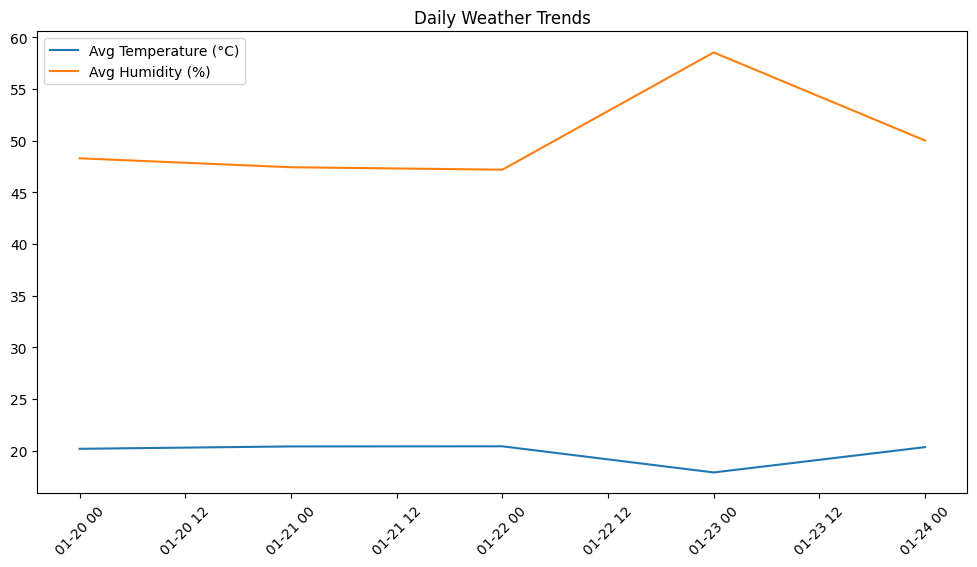

In [17]:
# Daily average
df_daily = df.groupby(df["Last Updated"].dt.date)[["Temperature (°C)", "Humidity (%)"]].mean()

plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily["Temperature (°C)"], label="Avg Temperature (°C)")
plt.plot(df_daily.index, df_daily["Humidity (%)"], label="Avg Humidity (%)")
plt.title("Daily Weather Trends")
plt.xticks(rotation=45)
plt.legend()
plt.show()


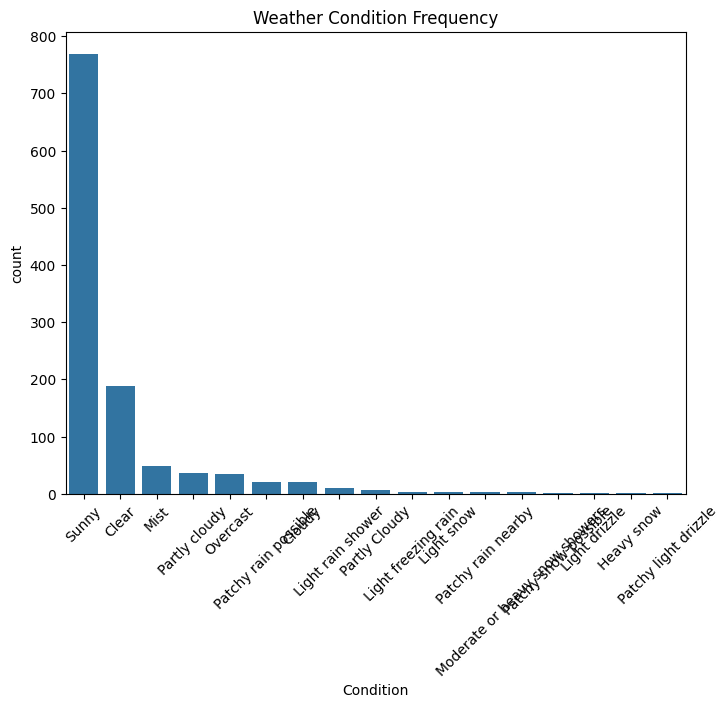

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Condition", order=df["Condition"].value_counts().index)
plt.title("Weather Condition Frequency")
plt.xticks(rotation=45)
plt.show()


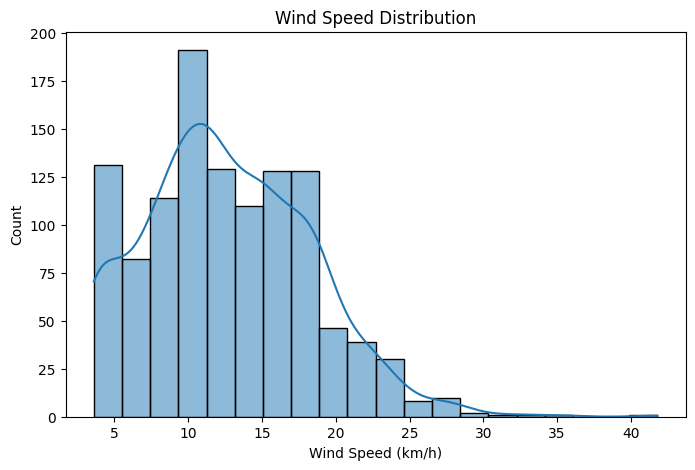

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df["Wind Speed (km/h)"], bins=20, kde=True)
plt.title("Wind Speed Distribution")
plt.show()


linear and polynomial reggeristion


In [20]:
# -----------------------------
# 0️⃣ Import libraries
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Identify exact columns
# -----------------------------
temperature_col = [col for col in df.columns if 'temperature' in col.lower()][0]
humidity_col = [col for col in df.columns if 'humidity' in col.lower()][0]
last_updated_col = [col for col in df.columns if 'last updated' in col.lower()][0]

# -----------------------------
# 2️⃣ Convert 'Last Updated' to datetime
# -----------------------------
df[last_updated_col] = pd.to_datetime(df[last_updated_col])

# -----------------------------
# 3️⃣ Create ordinal date for regression
# -----------------------------
df['date_ordinal'] = df[last_updated_col].map(pd.Timestamp.toordinal)



linear and polynmial regression


Linear Regression RMSE: 6.413116763744741


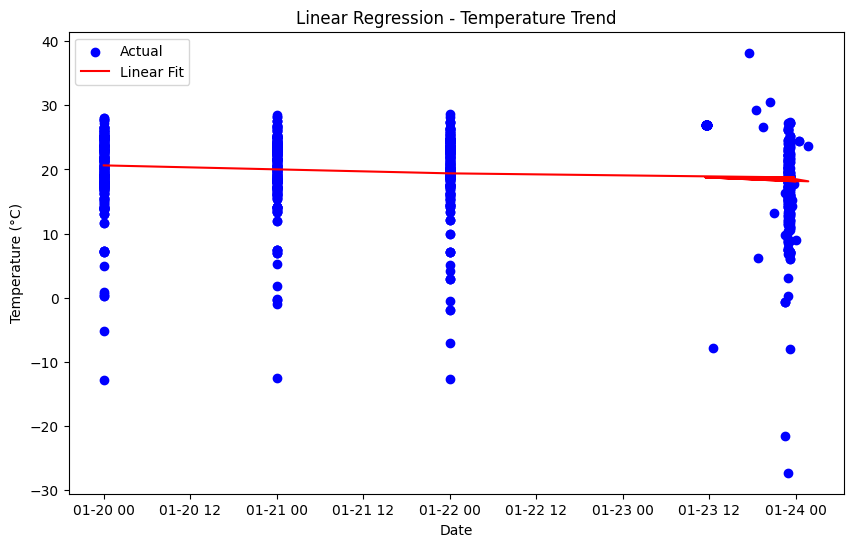

Polynomial Regression RMSE: 6.345464779669015


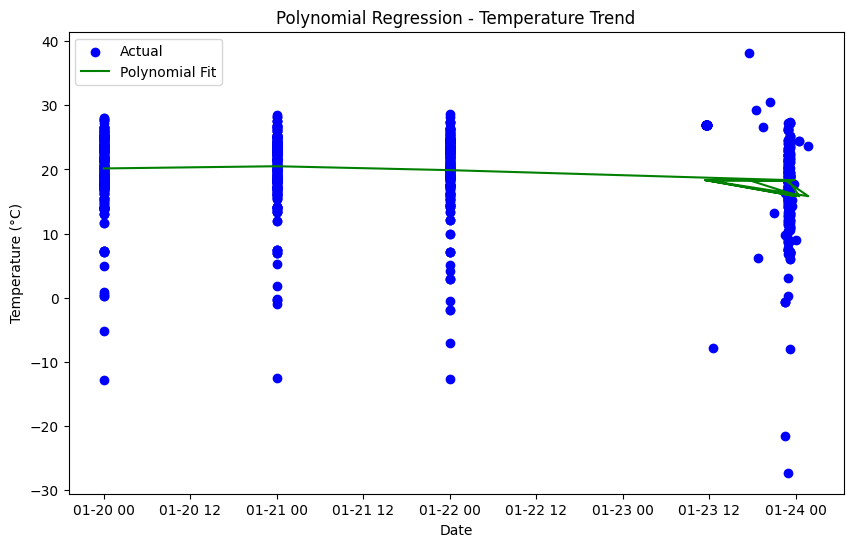

In [21]:
# -----------------------------
# Linear Regression
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Features & Target
X = df[['date_ordinal']]
y = df[[temperature_col]]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_model.predict(X_test)

# Evaluation
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("Linear Regression RMSE:", rmse_lin)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df[last_updated_col], df[temperature_col], color='blue', label='Actual')
plt.plot(df[last_updated_col], lin_model.predict(df[['date_ordinal']]), color='red', label='Linear Fit')
plt.xlabel('Date')
plt.ylabel(temperature_col)
plt.title('Linear Regression - Temperature Trend')
plt.legend()
plt.show()
# -----------------------------
# Polynomial Regression
# -----------------------------
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(poly.fit_transform(X_test))

# Evaluation
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", rmse_poly)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df[last_updated_col], df[temperature_col], color='blue', label='Actual')
plt.plot(df[last_updated_col], poly_model.predict(poly.fit_transform(df[['date_ordinal']])), color='green', label='Polynomial Fit')
plt.xlabel('Date')
plt.ylabel(temperature_col)
plt.title('Polynomial Regression - Temperature Trend')
plt.legend()
plt.show()


# =============================
# 4️⃣ Linear & Polynomial Regression
# =============================
X = df[['date_ordinal']]
y = df[[temperature_col]]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random forecast reggerission code

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# -----------------------------
# 1️⃣ Clean column names
# -----------------------------
df.columns = df.columns.str.strip()

# -----------------------------
# 2️⃣ Features and Target
# -----------------------------
features = ['Humidity (%)', 'Wind Speed (km/h)', 'District', 'State/UT']
target = 'Temperature (°C)'

# Encode categorical columns
df_encoded = df.copy()
for col in ['District', 'State/UT']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded[features]
y = df_encoded[target]

# -----------------------------
# 3️⃣ Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 4️⃣ Train Random Forest
# -----------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# -----------------------------
# 5️⃣ Predictions & Accuracy
# -----------------------------
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy_percent = r2 * 100

print("Random Forest RMSE:", rmse)
print("Random Forest R² Score:", r2)
print("Random Forest Accuracy (%):", accuracy_percent)

Random Forest RMSE: 4.018463391736375
Random Forest R² Score: 0.6144618503610619
Random Forest Accuracy (%): 61.44618503610619


XBoost Model


In [23]:
!pip install xgboost


In [24]:
import pandas as pd
import numpy as np

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/datasets/weather-1.csv")

# Convert date
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format="%Y-%m-%d %H:%M:%S")

# Resample to daily averages, excluding non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df_daily = df.set_index('Last Updated').resample('D')[numeric_cols].mean().reset_index()


# Encode Condition as numeric
# Check if 'Condition' column exists and is of object type before encoding
if 'Condition' in df_daily.columns and df_daily['Condition'].dtype == 'object':
    df_daily['Condition'] = df_daily['Condition'].astype('category').cat.codes
else:
    print("Warning: 'Condition' column not found or not of object type in resampled data. Skipping encoding.")

# Create lag features (previous 1-3 days temperature)
for lag in range(1, 4):
    df_daily[f'Temp_lag_{lag}'] = df_daily['Temperature (°C)'].shift(lag)

# Drop rows with NaN due to lagging
df_daily = df_daily.dropna()

df_daily.head()

,Last Updated,Temperature (°C),Humidity (%),Wind Speed (km/h),Temp_lag_1,Temp_lag_2,Temp_lag_3
3,2025-01-23,17.902817,58.517606,8.027113,20.430556,20.419097,20.189583
4,2025-01-24,20.350000,50.000000,6.475000,17.902817,20.430556,20.419097


In [27]:
# Features
X = df_daily[['Humidity (%)', 'Wind Speed (km/h)',
              'Temp_lag_1', 'Temp_lag_2', 'Temp_lag_3']]

# Target
y = df_daily['Temperature (°C)']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


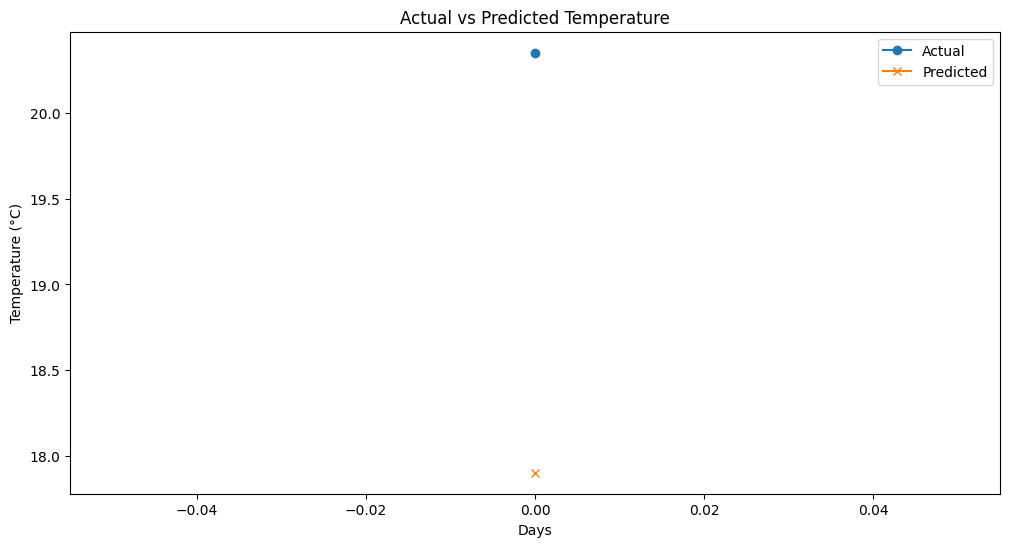

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [30]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
accuracy = 100 - mape

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


MAE: 2.447183227539064
RMSE: 2.447183227539064
MAPE: 12.03%
Accuracy: 87.97%


In [31]:
# Save cleaned dataframe for Power BI
df.to_csv("weather-l-cleaned.csv", index=False)

# If you want Excel format
df.to_excel("weather-l-cleaned.xlsx", index=False)


In [32]:
from google.colab import files
files.download("weather-l-cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>